# <center>BUILDING A HANDWRITTEN DIGITS CLASSIFIER - GUIDED PROJECT</center>

## Introduction

In this Guided Project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

## Libraries and data import

In [92]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [93]:
digits = load_digits()

## Data preparation

In [94]:
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Visualization of some images in the dataset

Scatter plot grid, with 2 rows and 4 columns.

In the first row:
- Display the images corresponding to rows 0, 100, 200, and 300.

In the second row:
- Display the images corresponding to rows 1000, 1100, 1200, and 1300.

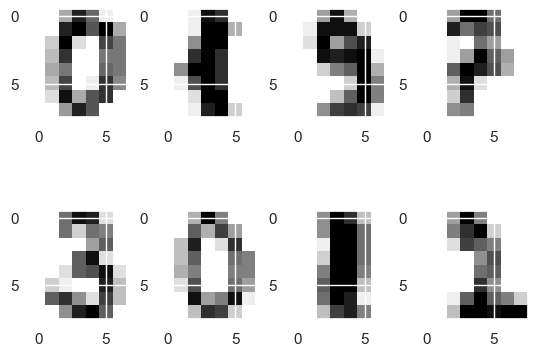

In [95]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')
axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

### Functions

In [96]:
def train_knn(n, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_acc = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_acc

def cross_validate(k):
    fold_accs = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_acc = test(model, test_features, test_labels)
        fold_accs.append(overall_acc)
    return fold_accs

### Calculations

In [97]:
# Calculate accuracy of the k-nearest neighbors model using different k-values
k_values = list(range(1,10))
k_overall_accs = [np.mean(cross_validate(k)) for k in k_values]

### Plot

<AxesSubplot:title={'center':'MEAN ACCURACY VS. K'}, xlabel='k', ylabel='Mean Accuracy'>

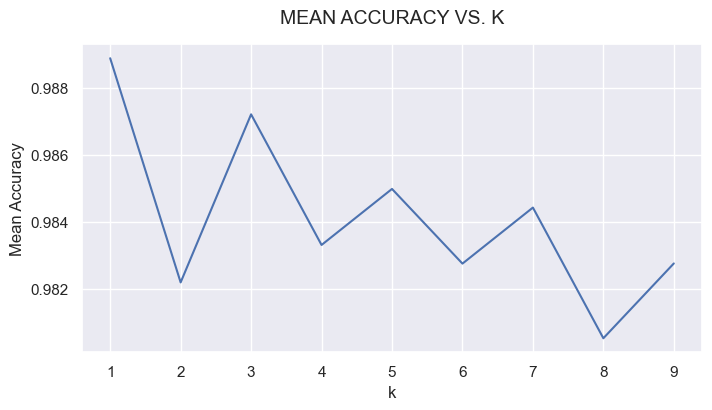

In [98]:
sns.set_theme()
plt.figure(figsize=(8,4))
plt.title("MEAN ACCURACY VS. K", fontsize="14", pad="15")
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
sns.lineplot(k_values, k_overall_accs)

## Neural Network with One Hidden Layer

### Functions

In [102]:
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp
def cross_validate_nn(neuron_arch):
    fold_accs = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_acc = test(model, test_features, test_labels)
        fold_accs.append(overall_acc)
    return fold_accs

### Calculations

In [103]:
# Calculate accuracy of the neural network model using different numbers of neurons
nn_one_neurons = [8, 16, 32, 64, 128, 256]
nn_one_accs = [np.mean(cross_validate_nn(n)) for n in nn_one_neurons]

### Plot

<AxesSubplot:title={'center':'Mean Accuracy vs. Neurons In Single Hidden Layer'}, xlabel='Neurons In Single Hidden Layer', ylabel='Mean Accuracy'>

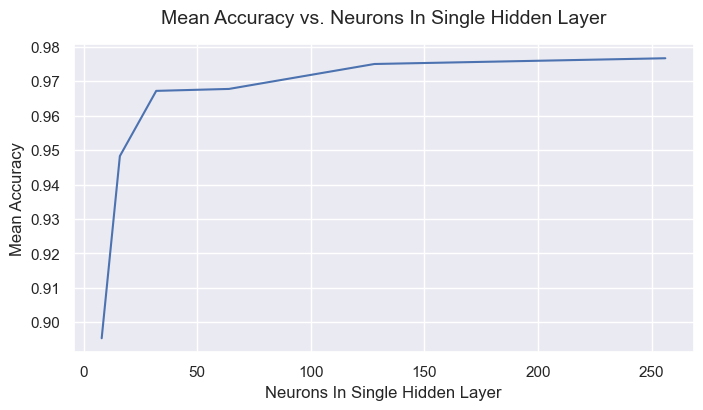

In [104]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer", fontsize="14", pad="15")
plt.xlabel('Neurons In Single Hidden Layer')
plt.ylabel('Mean Accuracy')
x = [i for i in nn_one_neurons]
sns.lineplot(x, nn_one_accs)

## Neural Network with Two Hidden Layers

### Calculations

In [78]:
# Calculate accuracy of the neural network model using different numbers of neurons
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]

nn_two_accs = [np.mean(cross_validate_nn(n)) for n in nn_two_neurons]
nn_two_accs

[0.9671739668398911, 0.9749604058401385, 0.9788604305864884]

### Plot

<AxesSubplot:title={'center':'Mean Accuracy vs. Neurons In Two Hidden Layers'}, xlabel='Neurons In Two Hidden Layers', ylabel='Mean Accuracy'>

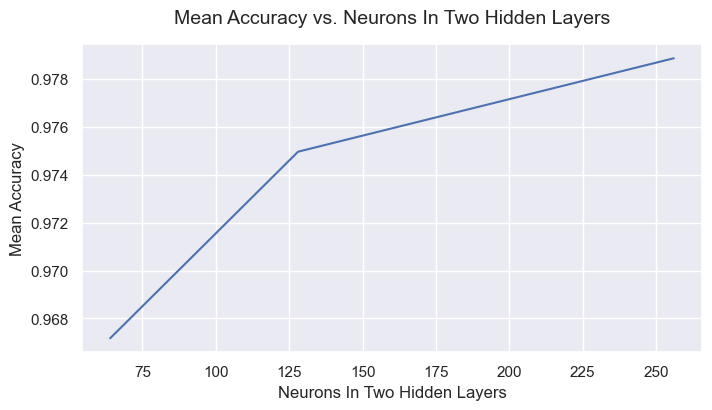

In [83]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers", fontsize="14", pad="15")
plt.xlabel('Neurons In Two Hidden Layers')
plt.ylabel('Mean Accuracy')
x = [i[0] for i in nn_two_neurons]
sns.lineplot(x, nn_two_accs)

## Neural Network with Three Hidden Layers

### Functions

In [87]:
def cross_validate_six(neuron_arch):
    fold_accs = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_acc = test(model, test_features, test_labels)
        fold_accs.append(overall_acc)
    return fold_accs

### Calculations

In [91]:
# Calculate accuracy of the neural network model using different numbers of neurons
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accs = [np.mean(cross_validate_six(n)) for n in nn_three_neurons]
nn_three_accs

[0.9337829803047195, 0.966620215533259, 0.9810888145670754]

### Plot

<AxesSubplot:title={'center':'Mean Accuracy vs. Neurons In Three Hidden Layers'}, xlabel='Neurons In Three Hidden Layers', ylabel='Mean Accuracy'>

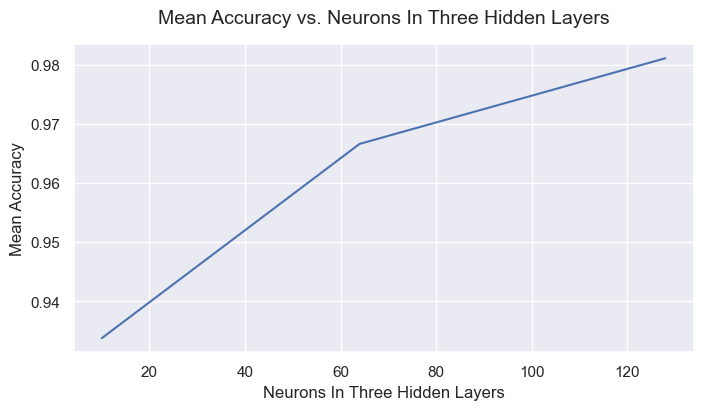

In [105]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers", fontsize="14", pad="15")
plt.xlabel('Neurons In Three Hidden Layers')
plt.ylabel('Mean Accuracy')
x = [i[0] for i in nn_three_neurons]
sns.lineplot(x, nn_three_accs)

## Summary

- All of the tested models are suitable for digit classification